In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

f = pd.read_hdf('df_full_02182020.hdf5','table')
# MaM, MiM, MaD are mergers
# NE, MiD are isolated

each index corresponds to object (i.e questions) R1-R8 corresponds to the classifier


In [2]:
inds = np.arange(1, 193+1)
bla = np.zeros((193, 7))
flags = np.ones((193, 7)).astype('bool')
merger = ['MaM', 'MiM', 'MaD']
for index, row in f.iterrows():
    #print(row['R1'], row['R2'])
    for c in np.arange(1, 1+7):
        if row[f'R{c}'] in merger:
            bla[index-1][c-1] = 1
        if row[f'R{c}_flag'] == 'Unsure with my classification':
            flags[index-1][c-1] = 0

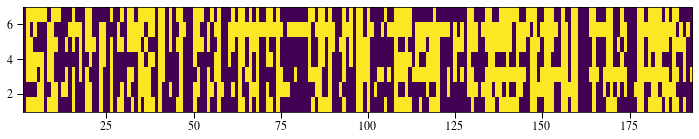

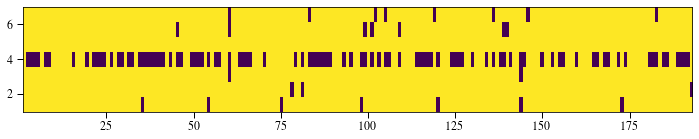

In [3]:
plt.figure(figsize=(12, 10))
plt.imshow(bla.T, aspect=5, extent=[1, 193, 1,7])
plt.figure(figsize=(12, 10))
plt.imshow(flags.T, aspect=5, extent=[1, 193, 1,7])

Text(0, 0.5, 'Merger')

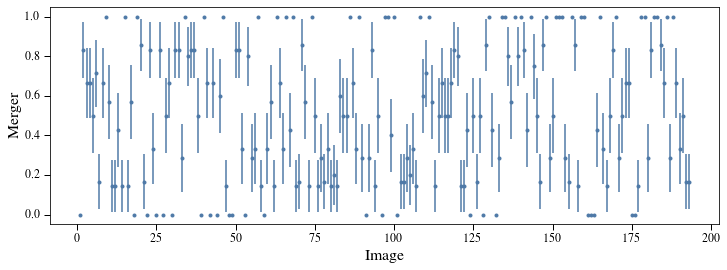

In [4]:
plt.figure(figsize=(12, 4))
for i in range(193):
    plt.errorbar(np.arange(1, 193+1)[i], bla[:,flags[i]].mean(axis=1)[i], yerr=bla[:,flags[i]].std(axis=1)[i]/7**0.5, fmt='.', color='C0')
plt.xlabel('Image')
plt.ylabel('Merger')

# Binomial distribution

I am interested in modeling the probability that any given image is a merger or is isolated, based off of each classifier's response.

There are four cases.

- The classifier, who can identify mergers correctly at a rate $r_M$, correctly identifies a merger. This can be written as $p(m\mid r_M, M)=r_M$.
- The classifier, who can identify isolated galaxies at a rate $r_I$, incorrectly identifies a merger. This can be written as $p(m\mid 1-r_I, I)=1-r_I$.
- The other two cases are $r_I$ and $1-r_M$ for correctly (incorrectly) identifying isolated galaxies (mergers).


So for every image, we have a vector of images, plus every person's classification. These are all independent processes. If a single person identifies a merger, we want the probability that the galaxy is a merger.

$$
p(M\mid m, r_M, r_I)=\frac{p(m\mid M, r_M, r_I)p(M)}{p(m\mid M, r_M, r_I)p(M)+P(m\mid I, r_M, r_I)p(I)}
$$

We know that $P(I)=1-P(M)$, and we have estimated $P(M)=f_M$. Therefore, 
$$
p(M\mid m, r_M, r_I)=\frac{r_Mf_M}{r_Mf_M+(1-r_I)(1-f_M)}.
$$

Conversely, what is the probability that an object is a merger if they say it is not a merger?

$$
p(M\mid i,r_M,r_I)=\frac{p(i\mid M,r_M,r_I)p(M)}{p(i\mid M,r_M,r_I)p(M)
+ P(i\mid I,r_M,r_I)p(I)}
$$

As with before, we can write
$$
p(M\mid i,r_M,r_I)=\frac{(1-r_M)f_M}{(1-r_M)f_M+r_I(1-f_M)}
$$

Let's talk about this a bit more...

Basically, for each individual, we have a measurement $m$, which
is 0 if isolated, 1 if merger. We know $p(m\mid M,r_{I},r_{M})=r_{M}$,
$p(m\mid I,r_{I,}r_{M})=1-r_{I}$, $p(i\mid M,r_{I},r_{M})=1-r_{M}$,
$p(i\mid I,r_{I},r_{M})=r_{I}$.

We are more interested in the probability of a given galaxy being
a merger or isolated given the classifier's choice.
$$
p(M\mid m,r_{I},r_{M})=\frac{p(m\mid M,r_{I},r_{M})p(M)}{p(m)}=\frac{p(m\mid M,r_{I},r_{M})p(M)}{\sum_{M}p(m\mid M,r_{I},r_{M})p(M)}
$$
where we are for the sake of brevity having $M$ be the true state
of the image, whereas $m$ is what the classifier puts down.

OK, what about the whole dataset, $p(M|\{m_{i},r_{I,i}r_{M,i}\})$?
I believe it is fair to say that these are independent draws. So let's
write this down;
$$
p(M|\{m_{i},r_{I,i},r_{M,i}\})=\frac{p(\{m_{i},r_{I,i},r_{M,i}\}\mid M)p(M)}{\sum_{M}p(\{m_{i},r_{I,i}r_{M,i}\}\mid M)p(M)}=\frac{p(M)\prod_{i}p(m_{i},r_{I,i},r_{M,i}\mid M)}{\sum_{M}\prod_{i}p(m_{i},r_{I,i},r_{M,i}\mid M)p(M)}
$$
and
$$
p(a,b\mid c)=p(a\mid c)p(b\mid a,c)
$$
So for the likelihood, we have
$$
p(m_{i},r_{I,i},r_{M,i}\mid M)=p(m_{i}\mid M)p(r_{I,i},r_{M,i}\mid m,M)
$$


OK, hold on. I want $p(m_{i}\mid r_{I,i},r_{M,i},M)$. This is like
$p(b\mid a,c)$ above;
$$
p(b\mid a,c)=\frac{p(a,b\mid c)}{p(a\mid c)}\to p(m_{i}\mid r_{I,i}r_{M,i},M)=\frac{p(m_{i},r_{I,i},r_{M,i}\mid M)}{p(r_{I,i},r_{M,i}\mid M)}
$$
so that
$$
p(m_{i},r_{I,i}r_{M,i}\mid M)=p(m_{i}\mid r_{I,i},r_{M,i},M)p(r_{I,i},r_{M,i}\mid M)
$$
Therefore,
$$
p(M\mid\{m_{i},r_{I,i},r_{M,i}\})=\frac{p(M)\prod_{i}p(m_{i}\mid r_{I,i},r_{M,i},M)p(r_{I,i},r_{M,i}\mid M)}{\sum_{M}\prod_{i}p(m_{i},r_{I,i},r_{M,i}\mid M)p(M)}=\frac{p(M)\prod_{i}p(m_{i}\mid r_{I,i},r_{M,i},M)p(r_{I,i},r_{M,i}\mid M)}{\sum_{M}\prod_{i}p(m_{i}\mid r_{I,i},r_{M,i},M)p(r_{I,i},r_{M,i}\mid M)p(M)}
$$
As a simplifying step, with $p(r_{I,i},r_{M,i}\mid M)$ constant for
all $i$, we should have
$$
p(M\mid\{m_{i},r_{I,i},r_{M,i}\})=\frac{p(M)\prod_{i}p(m_{i}\mid r_{I,i},r_{M,i},M)}{\sum_{M}\prod_{i}p(m_{i}\mid r_{I,i},r_{M,i},M)p(M)}
$$


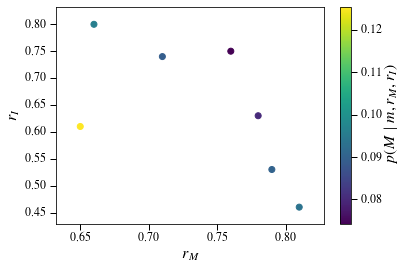

In [5]:
ms = bla[0]

r_Ms = np.array([0.71, 0.81, 0.78, 0.66, 0.79, 0.65, 0.76])
r_Is = np.array([0.74, 0.46, 0.63, 0.80, 0.53, 0.61, 0.75])


def p_M(m, r_M, r_I, f_M=0.2):
    if m == 0:
        return (1-r_M)*f_M/((1-r_M)*f_M + r_I*(1-f_M))
    else:
        return r_M*f_M/(r_M*f_M + (1-r_I)*(1-f_M))
P = np.zeros_like(ms)
for i in range(len(ms)):
    P[i] = p_M(ms[i], r_Ms[i], r_Is[i])
flag_i = flags[0]
plt.scatter(r_Ms[flag_i], r_Is[flag_i], c=P[flag_i])
plt.xlabel(r'$r_M$')
plt.ylabel(r'$r_I$')
plt.colorbar(label=r'$p(M\mid m,r_M,r_I)$')


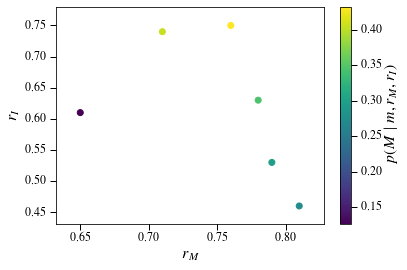

In [6]:
ms = bla[1]

r_Ms = np.array([0.71, 0.81, 0.78, 0.66, 0.79, 0.65, 0.76])
r_Is = np.array([0.74, 0.46, 0.63, 0.80, 0.53, 0.61, 0.75])


def p_M(m, r_M, r_I, f_M=0.2, flag=0):
    if m == 0:
        return (1-r_M)*f_M/((1-r_M)*f_M + r_I*(1-f_M))
    else:
        return r_M*f_M/(r_M*f_M + (1-r_I)*(1-f_M))
P = np.zeros_like(ms)
for i in range(len(ms)):
    P[i] = p_M(ms[i], r_Ms[i], r_Is[i])
    
flag_i = flags[1]
plt.scatter(r_Ms[flag_i], r_Is[flag_i], c=P[flag_i])
plt.xlabel(r'$r_M$')
plt.ylabel(r'$r_I$')
plt.colorbar(label=r'$p(M\mid m,r_M,r_I)$')


In [7]:
def get_merger_prob(ms, r_Ms, r_Is, f_M=0.2, flags=False):
    numerator = 1
    if flags is not False:
        r_Ms = r_Ms[flags]
        r_Is = r_Is[flags]
    for i in range(len(r_Ms)):
        if ms[i] == 0:
            numerator *= 1-r_Is[i]
        else:
            numerator *= r_Ms[i]
    numerator *= f_M
    denominator = 1
    for i in range(len(r_Ms)):
        if ms[i] == 0:
            denominator *= r_Is[i]
        else:
            denominator *= 1-r_Ms[i]
        
    denominator *= (1-f_M)
    denominator += numerator
    
    return numerator/denominator


In [8]:
print(get_merger_prob(bla[0], r_Ms, r_Is, flags=flags[0]))
print(get_merger_prob(bla[0], r_Ms, r_Is))

0.002853076441112509
0.002853076441112509


In [9]:
p_Ms = np.zeros(len(bla))
for i in range(len(bla)):
    p_Ms[i] = get_merger_prob(bla[i], r_Ms, r_Is, flags=flags[i])

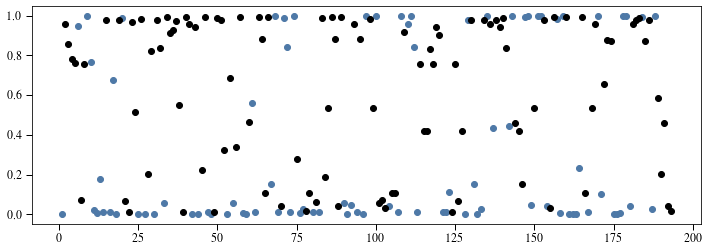

In [10]:
plt.figure(figsize=(12, 4))
#plt.errorbar(np.arange(1, 193+1), bla.mean(axis=1), yerr=bla.std(axis=1)/7**0.5, fmt='.')

t = np.sum(flags, axis=1)
cm = plt.cm.copper
plt.plot(np.arange(1, 193+1)[t==7], p_Ms[t==7], 'o')
plt.plot(np.arange(1, 193+1)[t<7], p_Ms[t<7], 'o', color='k')

#plt.plot(np.arange(1, 193+1)[t==6], p_Ms[t==6], 'o', color=cm(0))
#plt.plot(np.arange(1, 193+1)[t==5], p_Ms[t==5], 'o', color=cm(0.33))
#plt.plot(np.arange(1, 193+1)[t==4], p_Ms[t==4], 'o', color=cm(0.66))
#plt.plot(np.arange(1, 193+1)[t==3], p_Ms[t==3], 'o', color=cm(1))

In [11]:
import emcee
import numpy as np
filename = 'samples_8.h5'

reader = emcee.backends.HDFBackend(filename)

tau = reader.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
samples = reader.get_chain(discard=burnin, flat=True, thin=thin)
log_prob_samples = reader.get_log_prob(discard=burnin, flat=True, thin=thin)

print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

Bms, r_Ms, r_Is = samples[:,0], samples[:,1:8], samples[:,9:-1]
print(r_Ms.shape, r_Is.shape, Bms.shape)

burn-in: 585
thin: 124
flat chain shape: (29952, 17)
flat log prob shape: (29952,)
(29952, 7) (29952, 7) (29952,)


In [12]:
p_Ms_MC = np.zeros((len(bla), len(Bms)))

f_Ms = Bms/70
for i in range(len(bla)):
    for n in range(len(Bms)):
        p_Ms_MC[i,n] = get_merger_prob(bla[i], r_Ms[n], r_Is[n], f_M=f_Ms[n], flags=flags[i])

In [13]:
print(p_Ms_MC.shape)

(193, 29952)


In [14]:
lls, cens, uls = np.percentile(p_Ms_MC, np.array([50-16, 50, 50+16]), axis=1)

Text(0, 0.5, 'Probability of being in a merger')

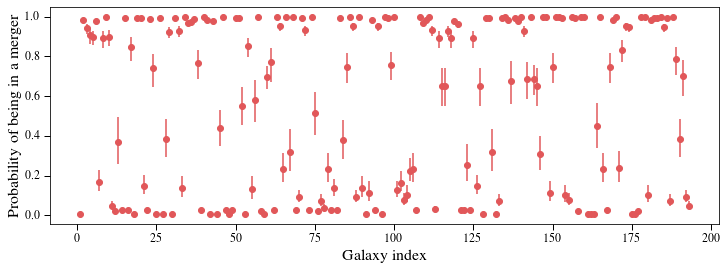

In [15]:
plt.figure(figsize=(12, 4))
#plt.errorbar(np.arange(1, 193+1), bla.mean(axis=1), yerr=bla.std(axis=1)/7**0.5, fmt='.')

plt.errorbar(np.arange(1,193+1), cens, yerr=[cens-lls, uls-cens], fmt='o', color='C2')
plt.xlabel('Galaxy index')
plt.ylabel('Probability of being in a merger')

In [16]:
inds = np.where((cens < 0.8) & (cens > 0.2))
labels = np.arange(1,193+1)[inds]
prob = np.round(cens[inds],2)


for l, ul, ll in zip(labels, uls[inds], lls[inds]):
    print(f'ind={l}, merger chance between {int(ll*100)}% and {int(ul*100)}%')


ind=13, merger chance between 25% and 49%
ind=24, merger chance between 64% and 81%
ind=28, merger chance between 29% and 48%
ind=38, merger chance between 68% and 83%
ind=45, merger chance between 34% and 52%
ind=52, merger chance between 45% and 64%
ind=56, merger chance between 46% and 68%
ind=60, merger chance between 63% and 75%
ind=61, merger chance between 67% and 84%
ind=65, merger chance between 16% and 31%
ind=67, merger chance between 22% and 43%
ind=75, merger chance between 40% and 61%
ind=79, merger chance between 16% and 31%
ind=84, merger chance between 28% and 48%
ind=85, merger chance between 66% and 81%
ind=99, merger chance between 68% and 82%
ind=105, merger chance between 17% and 29%
ind=106, merger chance between 16% and 31%
ind=115, merger chance between 55% and 74%
ind=116, merger chance between 55% and 74%
ind=123, merger chance between 17% and 36%
ind=127, merger chance between 55% and 74%
ind=131, merger chance between 22% and 43%
ind=137, merger chance betw

In [17]:
labs = ['R1','R2','R3','R4','R5','R6','R7']
labs_flag = [l + '_flag' for l in labs]
f[labs + labs_flag].loc[56]

R1                                    NE
R2                                   MiM
R3                                    NE
R4                                   MaD
R5                                   MaD
R6                                   MiD
R7                                    NE
R1_flag                              NaN
R2_flag                              NaN
R3_flag                              NaN
R4_flag    Unsure with my classification
R5_flag                              NaN
R6_flag                              NaN
R7_flag                              NaN
Name: 56, dtype: object